In [151]:
import numpy
import io
import sys
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import re




file_1= 'Datos_2015.csv' 
file_2= 'Datos_2016.csv'
file_3= 'Datos_2017.csv'
file_4= 'Datos_2018.csv'
file_5= 'Datos_2019.csv'
file_6= 'Datos_2020.csv'

data_1= pd.read_csv(file_1,sep=',',header=2)
data_2= pd.read_csv(file_2,sep=',',header=2)
data_3= pd.read_csv(file_3,sep=',',header=2)
data_4= pd.read_csv(file_4,sep=',',header=2)
data_5= pd.read_csv(file_5,sep=',',header=2)
data_6= pd.read_csv(file_6,sep=',',header=2)


data=pd.concat([data_1, data_2, data_3, data_4, data_5, data_6], ignore_index = True)

In [152]:
data

,Year,Month,Day,Hour,Minute,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Category
0,2015,1,1,0,30,0,0,24.0,0.117,9.0,89.35,26.0,1010,Baja
1,2015,1,1,1,30,0,0,24.0,0.117,8.7,94.87,26.0,1010,Baja
2,2015,1,1,2,30,0,0,24.0,0.117,8.3,94.43,25.0,1010,Baja
3,2015,1,1,3,30,0,0,23.0,0.117,7.7,93.67,25.0,1010,Baja
4,2015,1,1,4,30,0,0,23.0,0.117,7.0,93.20,25.0,1010,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,2020,12,31,19,30,0,0,25.0,0.170,6.0,84.11,27.9,1012,Baja
52556,2020,12,31,20,30,0,0,24.9,0.170,6.1,84.88,27.7,1013,Baja
52557,2020,12,31,21,30,0,0,24.9,0.170,6.3,85.43,27.6,1013,Baja
52558,2020,12,31,22,30,0,0,25.0,0.170,6.5,86.43,27.5,1013,Baja


# Definiciones

## GHI

La irradiancia horizontal global es la radiación solar total por unidad de área medida en una superficie horizontal de la tierra. Suele presentarse en W/m2 y puede desglosarse en dos componentes: irradiancia normal directa (DNI) e irradiancia horizontal difusa (DHI). La relación entre GHI, DHI y DNI se expresa en la siguiente ecuación:
        GHI=DHI+DNI∗cos(α zenith​)

## DNI

La irradiación directa normal (DNI) es la parte de la radiación solar que llega a la tierra en una trayectoria directa desde el sol.

Unidades: W/m2
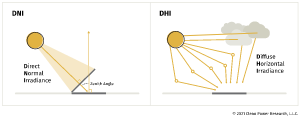

## DHI

La irradiación horizontal difusa (DIF o DHI) es la parte de la radiación solar que llega a la tierra de forma indirecta. El vapor de agua, los aerosoles y las nubes reflejan y absorben la radiación solar, difundiéndola por toda la atmósfera.

Unidades: W/m2

## Temperatura ambiente

Temperatura del aire medida a una altura de 2 metros. La temperatura ambiente es una consideración importante en la modelización del rendimiento fotovoltaico, ya que la temperatura afecta al rendimiento de los módulos fotovoltaicos y los inversores. Los módulos fotovoltaicos y los inversores suelen mostrar un rendimiento reducido a temperaturas extremas.

Los datos están disponibles en todas las regiones geográficas y pueden solicitarse como campo de salida con tipos de datos de serie temporal, año típico (TGY/TDY/año medio) y probabilidad de superación. Visite Fuentes de datos meteorológicos para obtener información sobre las fuentes de datos de temperatura ambiente de SolarAnywhere.

Unidades: Grados Celsius

## Velocidad del viento

La velocidad del viento medida a una altura de 10 metros. La velocidad del viento suele tenerse en cuenta en los modelos de rendimiento fotovoltaico, ya que puede tener un efecto de refrigeración en la temperatura de las células fotovoltaicas. La refrigeración puede mejorar el rendimiento de los módulos fotovoltaicos durante los periodos de alta temperatura ambiente.

Los datos están disponibles en todas las regiones geográficas y pueden solicitarse como un campo de salida con tipos de datos de serie temporal, año típico (TGY/TDY/año medio) y probabilidad de superación. Visita Fuentes de datos meteorológicos para obtener información sobre las fuentes de datos de velocidad del viento de SolarAnywhere.

Unidades: m/s

## Humedad relativa

La humedad relativa es una medida del contenido de humedad del aire a la temperatura ambiente. La humedad relativa se utiliza a menudo en la modelización del rendimiento fotovoltaico para estimar el contenido de agua precipitable del aire, que puede utilizarse junto con la masa de aire para aplicar factores de corrección espectral. Se ha demostrado que la composición espectral de la irradiación solar que llega a los módulos fotovoltaicos influye en el rendimiento del sistema.1

Los datos están disponibles en todas las regiones geográficas y pueden solicitarse como campo de salida con tipos de datos de serie temporal, año típico (TGY/TDY/año medio) y probabilidad de superación. Los datos de humedad relativa no están disponibles actualmente para los períodos de previsión. Visite Fuentes de datos meteorológicos para obtener información sobre las fuentes de datos de humedad relativa de SolarAnywhere.

Unidades: %.

## Albedo

El albedo es una medida de la fracción de la irradiación horizontal global que se refleja en el suelo. Visita la sección de soporte de albedo para obtener una descripción detallada de los datos de albedo de SolarAnywhere.

Los datos de albedo de SolarAnywhere tienen en cuenta las condiciones de la nieve. Las condiciones de nieve son muy variables de un año a otro. Por ello, recomendamos utilizar los 12 promedios mensuales a largo plazo presentados en el archivo de resumen del año medio para su uso en la modelización del rendimiento fotovoltaico, en lugar de los datos de albedo presentados en los archivos del año típico. Los archivos de años típicos se generan con una ponderación del 100% en el componente de irradiación. Por ejemplo, los datos de enero seleccionados para el archivo del año típico pueden ser de enero de 2002 porque son los más representativos de las condiciones típicas de irradiación, pero en enero de 2002 puede haber caído una nevada inferior a la media, lo que se reflejaría en los datos de albedo.

Visite Resumen del año medio para ver información adicional sobre este tipo de archivo y ver cómo utilizar los valores del albedo medio en la modelización fotovoltaica.

Los datos están disponibles en todas las regiones geográficas y pueden solicitarse como un campo de salida con tipos de datos de serie temporal, año típico (TGY/TDY/año medio) y probabilidad de superación. Los datos de albedo se limitan a las versiones 3.5 y posteriores de SolarAnywhere y actualmente no están disponibles para los períodos de previsión.

Unidades: Sin unidades

## Dew Point

El punto de rocío o temperatura de rocío es la temperatura más alta a la que empieza a condensarse el vapor de agua contenido en el aire, produciendo rocío, neblina, cualquier tipo de nube o, en caso de que la temperatura sea lo suficientemente baja, escarcha

# Analisis Descriptivo

El dataset contiene una colección completa en serie de valores horarios y semihorarios de datos meteorológicos y las tres medidas más comunes de radiación solar: irradiancia horizontal global, normal directa y horizontal difusa. Cubre una región de las instalaciones de la Universidad Tecnológica de Bolívar.

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               52560 non-null  int64  
 1   Month              52560 non-null  int64  
 2   Day                52560 non-null  int64  
 3   Hour               52560 non-null  int64  
 4   Minute             52560 non-null  int64  
 5   DHI                52560 non-null  int64  
 6   DNI                52560 non-null  int64  
 7   Dew Point          52560 non-null  float64
 8   Surface Albedo     52560 non-null  float64
 9   Wind Speed         52560 non-null  float64
 10  Relative Humidity  52560 non-null  float64
 11  Temperature        52560 non-null  float64
 12  Pressure           52560 non-null  int64  
 13  Category           52560 non-null  object 
dtypes: float64(5), int64(8), object(1)
memory usage: 5.6+ MB


In [154]:
data.isnull().sum()

Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
DHI                  0
DNI                  0
Dew Point            0
Surface Albedo       0
Wind Speed           0
Relative Humidity    0
Temperature          0
Pressure             0
Category             0
dtype: int64

## Información de los atributos 

Las variables son: 
1. Year : Numerica
2. Month : Numerica
3. Day : Numerica
4. Hour : Numerica
5. Minute: Numerica
6. DHI : Numerica
7. DNI : Numerica
8. Dew Point : Numerica
9. Surface Albedo : Numerica
10. Wind Speed : Numerica
11. Relative Humidity : Numerica
12. Temperature : Numerica
13. Pressure : Numerica

No existen valores perdidos

## Analisis de distribuciones 

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a

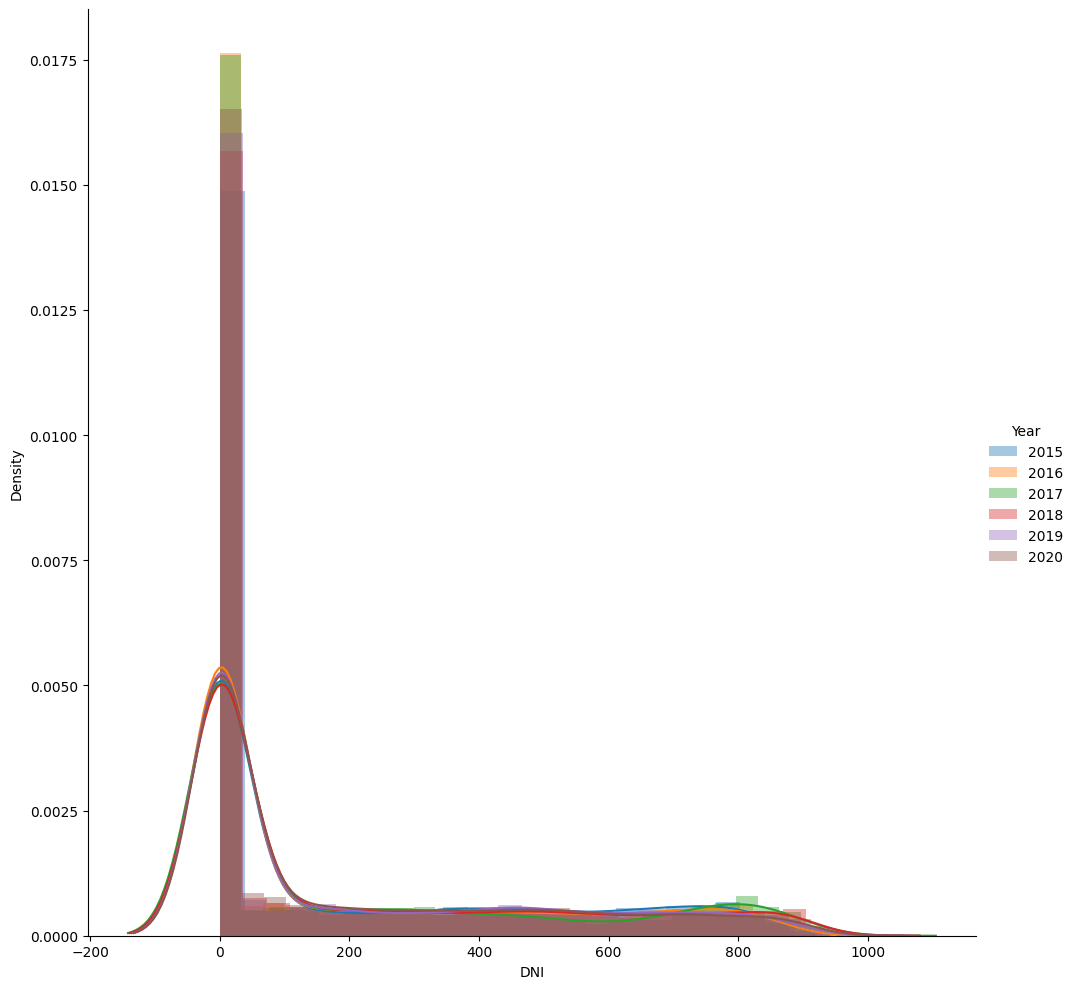

In [155]:
sns.FacetGrid(data, hue='Year', height=10).map(sns.distplot, 'DNI').add_legend();

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a

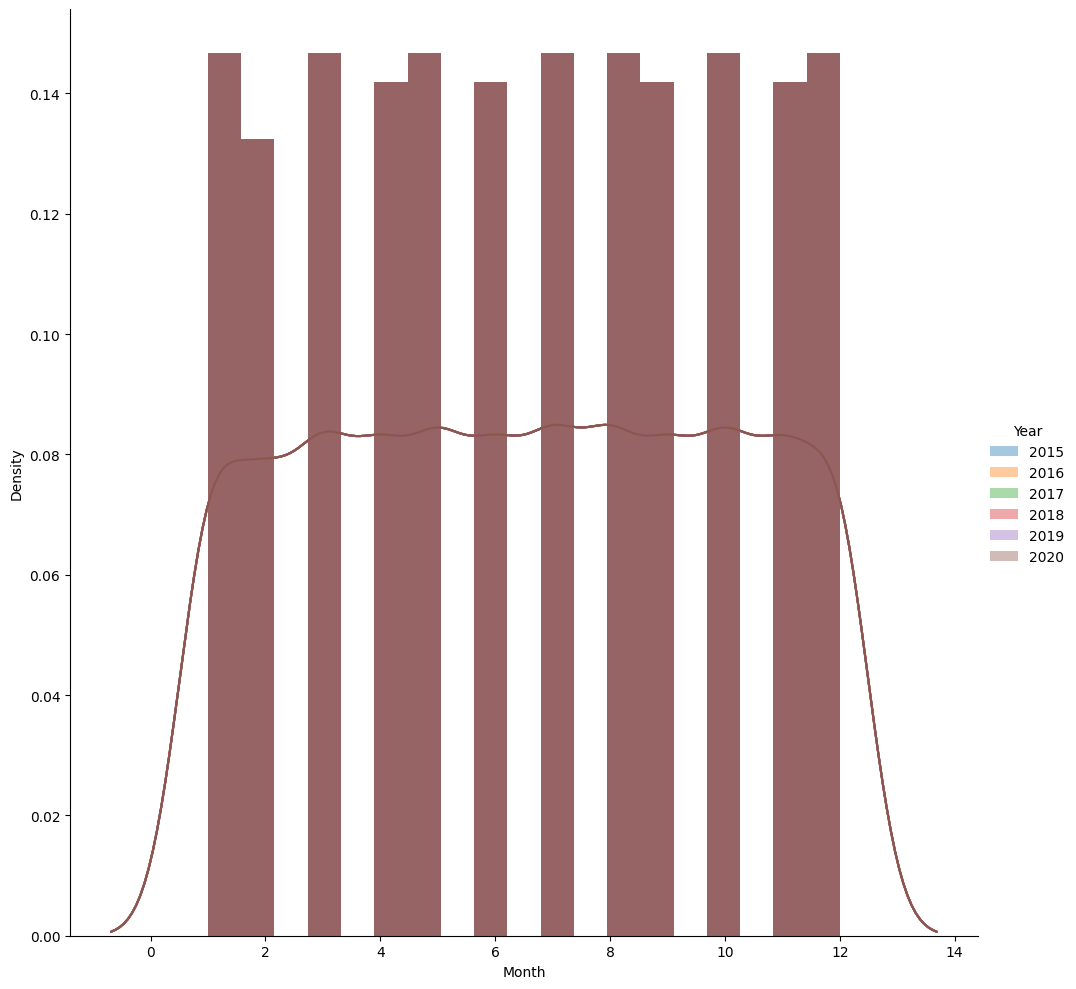

In [156]:
sns.FacetGrid(data, hue='Year', height=10).map(sns.distplot, 'Month').add_legend();

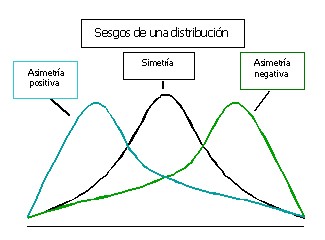

Una distribución asimétrica es una distribución no simétrica por lo que los datos se distribuyen de forma desigual en los extremos de la distribución. Cuando hay muchos datos con valores bajos y pocos datos con valores altos la distribución es asimétrica positiva. En este dataset, la distribución de DNI con respecto a los años, meses y dias no siguen un comportamiento normal, debido a que la distribuciónes no son simetricas.

In [157]:
data['Category']=data['Category'].replace('Baja',1)

In [158]:
data['Category']=data['Category'].replace('BajaM',2)
data['Category']=data['Category'].replace('Media',3)
data['Category']=data['Category'].replace('MediaA',4)
data['Category']=data['Category'].replace('Alta',5)

In [159]:
data.describe()

,Year,Month,Day,Hour,Minute,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Category
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.0,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,2017.500000,6.526027,15.720548,11.500000,30.0,97.016762,193.474182,24.672608,0.129051,4.497629,83.317142,28.265616,1009.997926,1.754775
std,1.707841,3.447884,8.796331,6.922252,0.0,132.571103,278.672330,1.333836,0.023206,2.193022,9.769555,1.554578,3.473954,1.223873
min,2015.000000,1.000000,1.000000,0.000000,30.0,0.000000,0.000000,18.000000,0.090000,0.100000,46.030000,24.000000,1000.000000,1.000000
25%,2016.000000,4.000000,8.000000,5.750000,30.0,0.000000,0.000000,24.000000,0.110000,2.800000,76.657500,27.000000,1010.000000,1.000000
50%,2017.500000,7.000000,16.000000,11.500000,30.0,0.000000,0.000000,25.000000,0.123000,4.200000,85.690000,28.000000,1010.000000,1.000000
75%,2019.000000,10.000000,23.000000,17.250000,30.0,161.000000,369.000000,25.900000,0.150000,6.000000,90.880000,29.100000,1012.000000,2.000000
max,2020.000000,12.000000,31.000000,23.000000,30.0,520.000000,963.000000,27.800000,0.180000,12.000000,100.000000,34.200000,1018.000000,5.000000


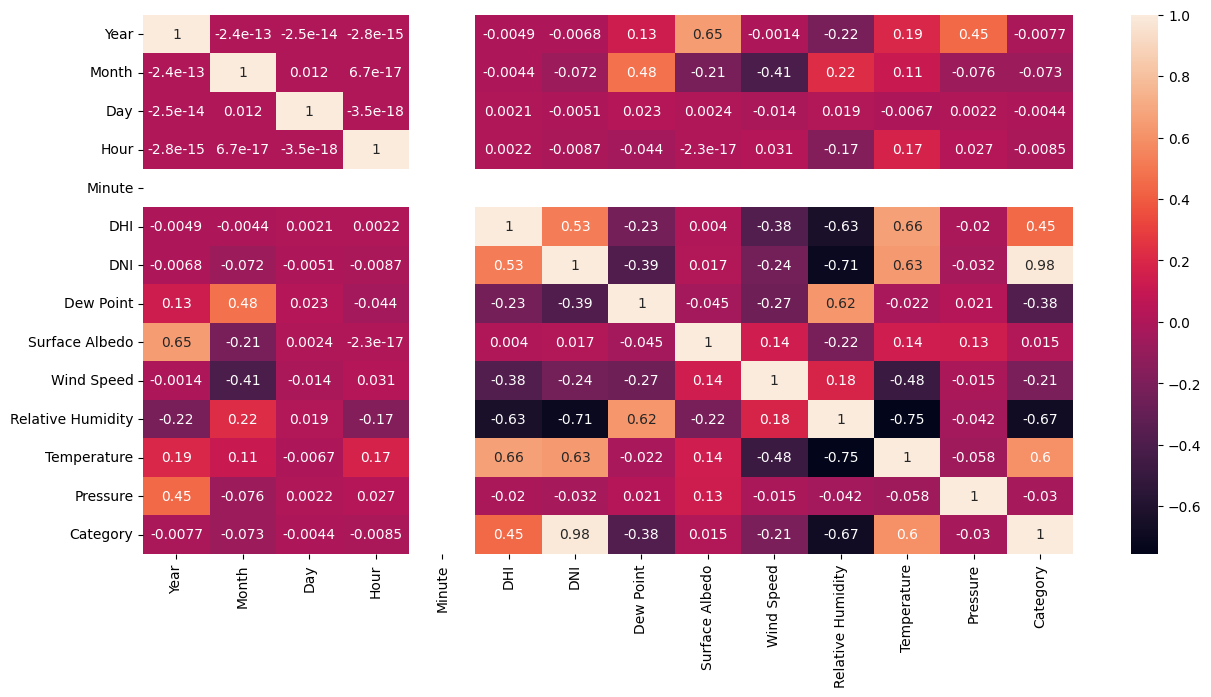

In [160]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
x=data[['Dew Point', 'Wind Speed','Relative Humidity', 'Temperature']]

In [163]:
y=data['Category']

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [165]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36792, 4)
(36792,)
(15768, 4)
(15768,)


In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_train1, y_train1) 
prediction = rf.predict(x_test1)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


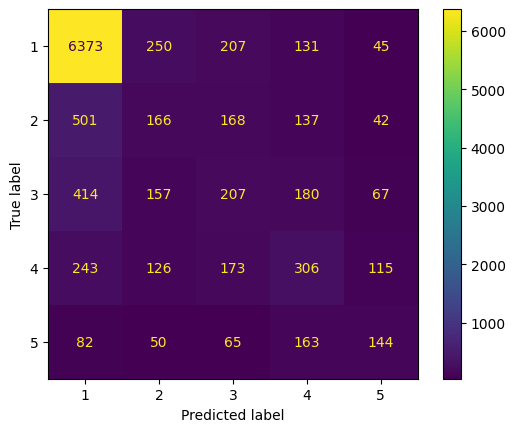

In [168]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
plot_confusion_matrix(rf, x_test1, y_test1) 
plt.show()

In [169]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.38483684071894275
Precision:  0.3987107391588004
Recall:  0.375755894750475
Accuracy:  0.6845509893455098


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


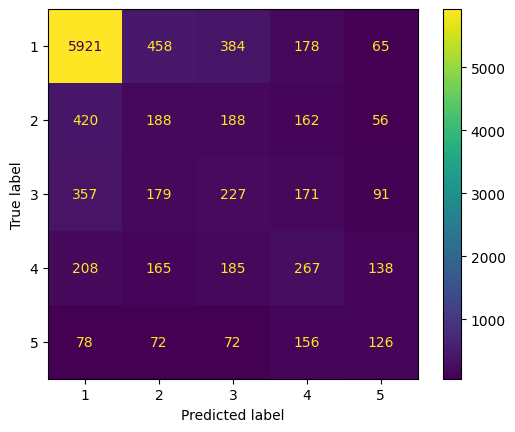

F1:  0.3568767188022098
Precision:  0.3580709366540037
Recall:  0.35585181284513284
Accuracy:  0.6401255707762558


In [170]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)
dtc= DecisionTreeClassifier(criterion='entropy').fit(x_train1,y_train1)
prediction=dtc.predict(x_test1)
plot_confusion_matrix(dtc, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


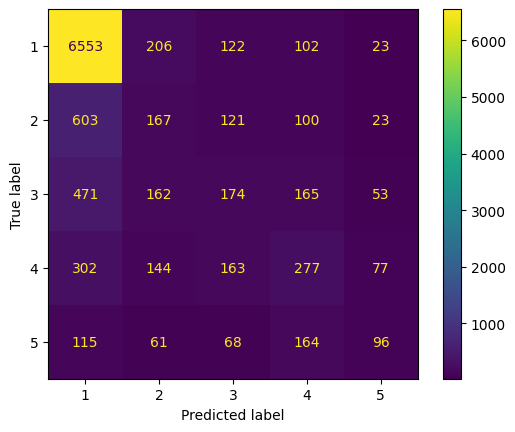

F1:  0.36590046376727725
Precision:  0.40092032166755576
Recall:  0.34958209745098906
Accuracy:  0.6913051750380518


In [171]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)
neigh = KNeighborsClassifier().fit(x_train1,y_train1)
prediction=neigh.predict(x_test1)
plot_confusion_matrix(neigh, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

In [172]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [173]:
ros=RandomOverSampler()

In [174]:
smote=SMOTE()

In [175]:
dataRos,targetRos=ros.fit_resample(x,y)

In [176]:
dataRos

,Dew Point,Wind Speed,Relative Humidity,Temperature
0,24.0,9.0,89.35,26.0
1,24.0,8.7,94.87,26.0
2,24.0,8.3,94.43,25.0
3,23.0,7.7,93.67,25.0
4,23.0,7.0,93.20,25.0
...,...,...,...,...
175425,24.1,4.1,73.20,29.4
175426,24.0,1.5,72.80,31.0
175427,24.2,3.0,68.71,30.6
175428,24.0,2.3,84.88,28.0


In [177]:
targetRos.sum()

526290

In [178]:
dataSmote,targetSmote=smote.fit_resample(x,y)

In [179]:
dataSmote

,Dew Point,Wind Speed,Relative Humidity,Temperature
0,24.000000,9.000000,89.350000,26.000000
1,24.000000,8.700000,94.870000,26.000000
2,24.000000,8.300000,94.430000,25.000000
3,23.000000,7.700000,93.670000,25.000000
4,23.000000,7.000000,93.200000,25.000000
...,...,...,...,...
175425,22.315131,3.976754,57.206382,31.853508
175426,24.277271,2.622729,67.477124,31.000000
175427,22.400000,3.310595,64.327286,29.836865
175428,22.000000,2.782660,72.177260,28.000000


In [180]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [181]:
rus=RandomUnderSampler()

In [182]:
nm=NearMiss()

In [183]:
dataRus,targetRus=rus.fit_resample(x,y)
dataNm,targetNm=nm.fit_resample(x,y)

In [184]:
dataRus

,Dew Point,Wind Speed,Relative Humidity,Temperature
0,25.0,4.8,93.11,27.0
1,23.0,6.1,87.58,26.0
2,27.0,3.4,89.50,28.9
3,24.0,9.9,84.30,27.0
4,26.0,4.9,97.98,28.0
...,...,...,...,...
12210,22.0,2.2,60.60,30.5
12211,22.4,1.7,60.67,30.9
12212,22.8,2.0,61.36,31.1
12213,23.1,2.8,63.33,30.9


In [185]:
dataNm

,Dew Point,Wind Speed,Relative Humidity,Temperature
0,25.0,2.7,79.59,29.0
1,25.0,2.7,79.73,29.0
2,24.0,3.2,80.99,28.0
3,22.0,6.0,69.76,29.0
4,25.0,2.8,79.61,28.9
...,...,...,...,...
12210,22.0,2.2,60.60,30.5
12211,22.4,1.7,60.67,30.9
12212,22.8,2.0,61.36,31.1
12213,23.1,2.8,63.33,30.9


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


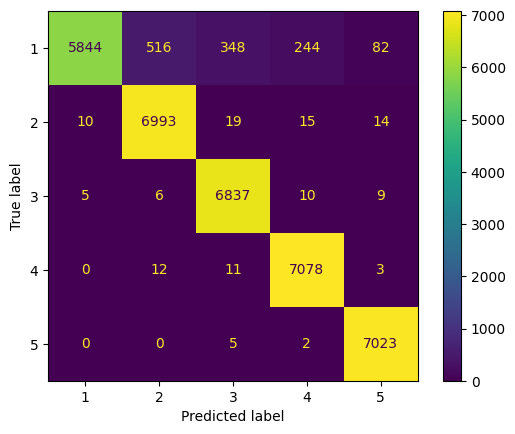

F1:  0.9615882443146718
Precision:  0.9642854477901105
Recall:  0.9627143154065976
Accuracy:  0.9626346690987858


In [186]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataRos,targetRos,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_train1, y_train1) 
prediction = rf.predict(x_test1)
plot_confusion_matrix(rf, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


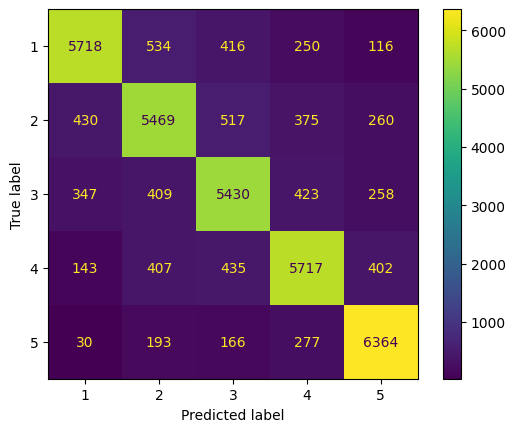

F1:  0.8175874708551072
Precision:  0.8178089352959275
Recall:  0.8178605490464486
Accuracy:  0.8179330787208573


In [187]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataSmote,targetSmote,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_train1, y_train1) 
prediction = rf.predict(x_test1)
plot_confusion_matrix(rf, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


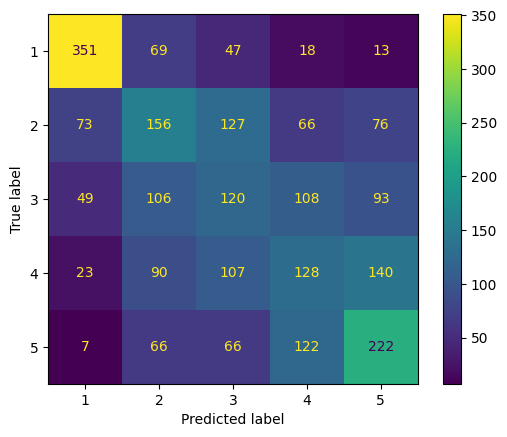

F1:  0.39603056938758663
Precision:  0.3945563947234191
Recall:  0.39841910813050413
Accuracy:  0.3999181334424887


In [188]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataRus,targetRus,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_train1, y_train1) 
prediction = rf.predict(x_test1)
plot_confusion_matrix(rf, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


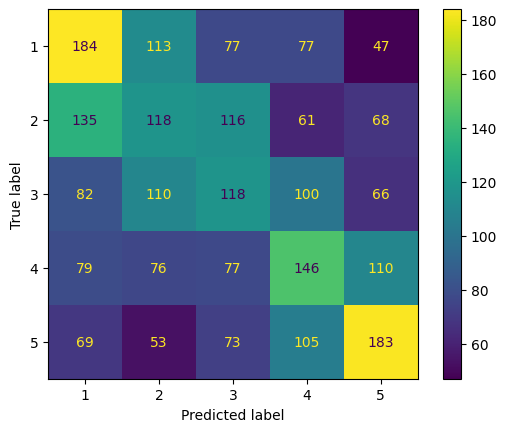

F1:  0.3056937962722836
Precision:  0.3053656812223082
Recall:  0.30647743558432056
Accuracy:  0.30659025787965616


In [189]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataNm,targetNm,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_train1, y_train1) 
prediction = rf.predict(x_test1)
plot_confusion_matrix(rf, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

Otros algoritmos


In [190]:
from sklearn.tree import DecisionTreeClassifier

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


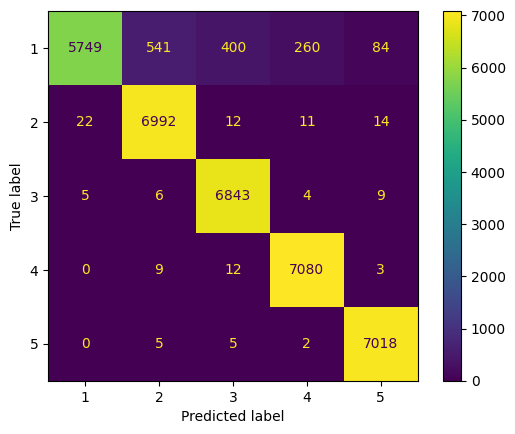

F1:  0.9587310422800499
Precision:  0.9617947295325614
Recall:  0.9600735924636048
Accuracy:  0.9599840392179216


In [191]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataRos,targetRos,test_size=0.2,random_state=42)
dtc= DecisionTreeClassifier(criterion='entropy').fit(x_train1,y_train1)
prediction=dtc.predict(x_test1)
plot_confusion_matrix(dtc, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


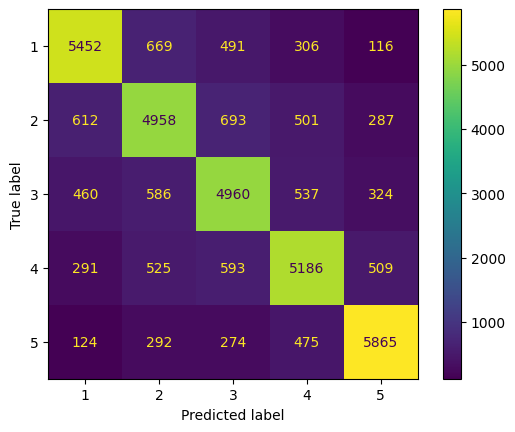

F1:  0.7529194710188818
Precision:  0.7529390402704291
Recall:  0.7529686051635959
Accuracy:  0.753035398734538


In [192]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataSmote,targetSmote,test_size=0.2,random_state=42)
dtc= DecisionTreeClassifier(criterion='entropy').fit(x_train1,y_train1)
prediction=dtc.predict(x_test1)
plot_confusion_matrix(dtc, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


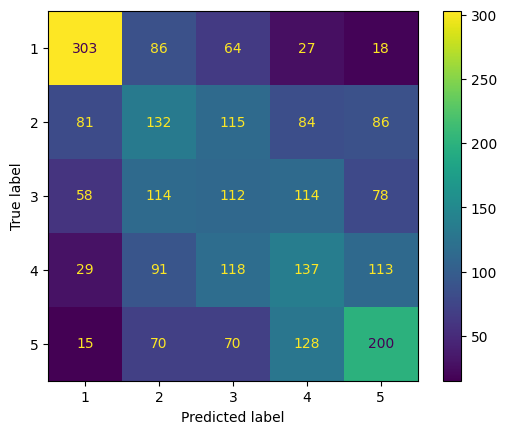

F1:  0.3611935529509277
Precision:  0.3617315937781136
Recall:  0.36072089468338925
Accuracy:  0.3618501841997544


In [193]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataRus,targetRus,test_size=0.2,random_state=42)
dtc= DecisionTreeClassifier(criterion='entropy').fit(x_train1,y_train1)
prediction=dtc.predict(x_test1)
plot_confusion_matrix(dtc, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


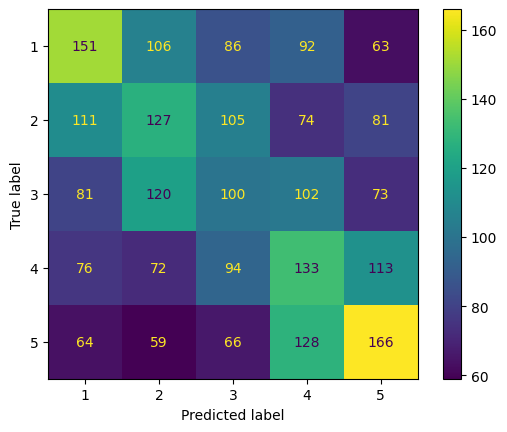

F1:  0.2765859619845224
Precision:  0.2765701545107981
Recall:  0.27690864983078994
Accuracy:  0.27711829717560377


In [194]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataNm,targetNm,test_size=0.2,random_state=42)
dtc= DecisionTreeClassifier(criterion='entropy').fit(x_train1,y_train1)
prediction=dtc.predict(x_test1)
plot_confusion_matrix(dtc, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

Otro algoritmo

In [195]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


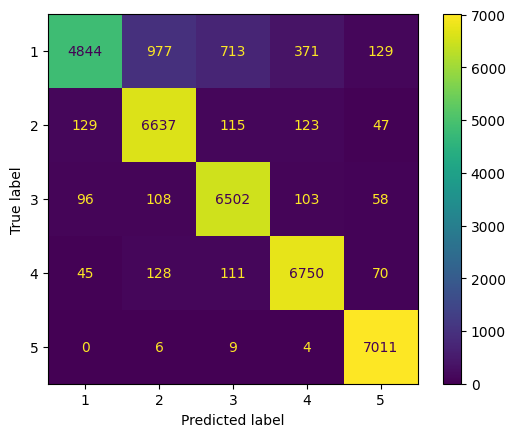

F1:  0.9015317722938949
Precision:  0.9082942764502999
Recall:  0.9048506969094616
Accuracy:  0.9047483326683008


In [196]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataRos,targetRos,test_size=0.2,random_state=42)
neigh = KNeighborsClassifier().fit(x_train1,y_train1)
prediction=neigh.predict(x_test1)
plot_confusion_matrix(neigh, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


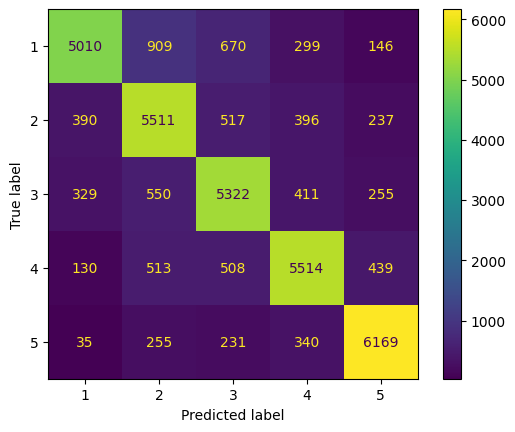

F1:  0.7845628622713929
Precision:  0.7880191349410535
Recall:  0.7845128547558008
Accuracy:  0.7845294419426552


In [197]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataSmote,targetSmote,test_size=0.2,random_state=42)
neigh = KNeighborsClassifier().fit(x_train1,y_train1)
prediction=neigh.predict(x_test1)
plot_confusion_matrix(neigh, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


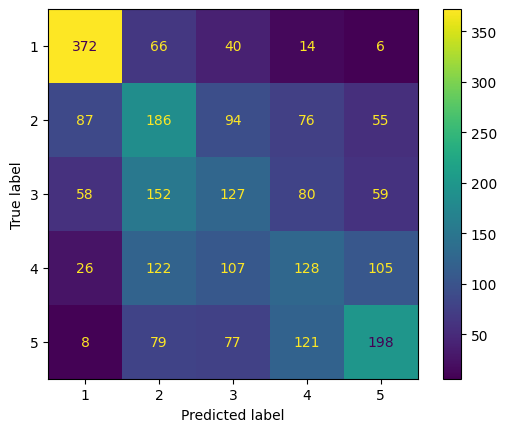

F1:  0.40832627363131363
Precision:  0.40830835152690376
Recall:  0.411904324113178
Accuracy:  0.4138354482194024


In [198]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataRus,targetRus,test_size=0.2,random_state=42)
neigh = KNeighborsClassifier().fit(x_train1,y_train1)
prediction=neigh.predict(x_test1)
plot_confusion_matrix(neigh, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


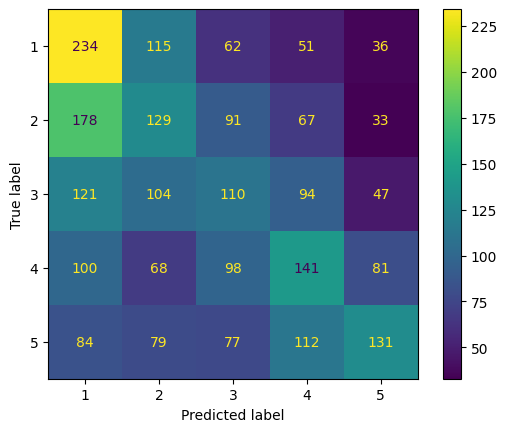

F1:  0.30093394965732867
Precision:  0.3081446992215023
Recall:  0.3040328115891996
Accuracy:  0.30495292672943103


In [199]:
x_train1,x_test1,y_train1,y_test1=train_test_split(dataNm,targetNm,test_size=0.2,random_state=42)
neigh = KNeighborsClassifier().fit(x_train1,y_train1)
prediction=neigh.predict(x_test1)
plot_confusion_matrix(neigh, x_test1, y_test1) 
plt.show()
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

Otro algoritmo

Final